1.Load the experiment data

In [1]:
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file("housing_scale")

2.Divide dataset

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
y=y.reshape(506,1)
X_train, X_validation, y_train, y_validation = train_test_split(X, y ,test_size = 1/3.,random_state = 0)

3.Initialize linear model parameters

In [3]:
theta=np.ones(13)
theta=theta.reshape(13,1)
alpha=0.01
num_iters=1500


4.Choose loss function and derivation

In [4]:
def computeCost(X,y,theta,lamda=0):
    n=y.size
    R=lamda*1.0/(2*n)*np.sum(np.square(theta))
    J=(1.0/(2*n))*np.sum(np.square(X.dot(theta)-y))+R
    return J

5.Gradient descent

In [5]:
def gradientDescent(X,y,theta,alpha=0.5,num_iters=1500,lamda=0):
    n=y.size
    J_history=np.zeros(num_iters)
    J_validation=np.zeros(num_iters)
    for i in range(num_iters):
        J_history[i]=computeCost(X,y,theta,lamda)
        J_validation[i]=computeCost(X_validation,y_validation,theta,lamda)
        deltaTheta=(1.0/n)*(X.T.dot(X.dot(theta)-y))+(lamda*1.0/n)*theta
        theta=theta-alpha*deltaTheta
    return theta,J_history,J_validation

6.Graph

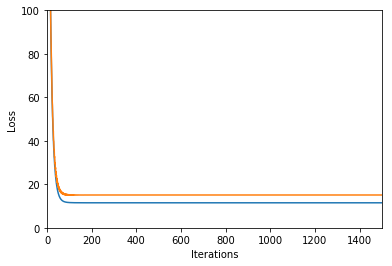

In [6]:
import matplotlib.pyplot as plt
theta,L_train,L_validation=gradientDescent(X_train,y_train,theta,lamda=0.4)
plt.xlim(0,1500)
plt.ylim(0,100)
plt.plot(L_train)
plt.plot(L_validation)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()